## Projeto de Airbnb Rio de Janeiro - Ferramenta de Previsão de Preço Para aluguel de imóveis

### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.
    
Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.
    
Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)
  
Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.
    
### Nosso objetivo
 
Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.
   
### O que temos disponível, inspirações e créditos e expectativas
   
As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro\n"
 
Caso queira uma outra solução, podemos olhar como referência a solução do usuário Allan Bruno do kaggle no Notebook: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb
  
Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.
  
- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados.

### Importar Bibliotecas e Bases de Dados

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
meses = {'jan':1,'fev':2,'mar':3,'abr':4,'mai':5,'jun':6,'jul':7,'ago':8,'set':9,'out':10,"nov":11,'dez':12}

caminho_bases = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:-4]

    
    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)

display(base_airbnb)

C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:14: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:14: DtypeWarning

C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_airbnb = base_airbnb.append(df)
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\928003820.py:14: DtypeWarn

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

- vamos retirar algumas colunas para melhorar a performance do nosso modelo
- Será feita uma análise para ver quais colunas pode ser retiradas sem prejudircar o resultado final do nosso modelo.
- Tipos de colunas à serem excluídas:
    1. IDs, Links e informações não relevantes para o modelo.
    2. Colunas com informações repetidas ex data/mês
    3. Colunas com texto livre, visto que não serão incluídas no nosso modelo.
    4. Colunas com todos ou quase todos valores são iguais.
   
    
- Para isso, vamos criar um arquivo em excel com os 1000 primeiros registros e fazer uma análise qualitativa.

In [3]:
base_airbnb.head(1000).to_csv('primeiros 1000 registros.csv', sep= ';')

### Depois da análise qualitativa das colunas, ficamos com as seguintes colunas:


In [4]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb = base_airbnb.loc[:,colunas]

display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                     NaN                NaN                 f   
1          within an hour               100%                 t   
2          within an hour               100%                 f   
3          within an hour               100%                 f   
4          within an hour               100%                 t   
...                   ...                ...               ...   
34324      within an hour                93%                 f   
34325                 NaN                NaN                 f   
34326  within a few hours                74%                 f   
34327                 NaN                NaN                 f   
34328  a few days or more                38%                 f   

       host_listings_count   latitude  longitude property_type  \
0                      1.0 -22.946854 -43.182737     Apartment   
1                      2.0 -22.965919 -43.178962   Condominium   
2                      1.0 -22.985698 -43.201935     Apartment   
3                      3.0 -22.977117 -43.190454     Apartment   
4                      1.0 -22.983024 -43.214270     Apartment   
...                    ...        ...        ...           ...   
34324                  0.0 -23.003180 -43.342840     Apartment   
34325                  0.0 -22.966640 -43.393450     Apartment   
34326                 32.0 -22.962080 -43.175520     Apartment   
34327                  0.0 -23.003400 -43.341820     Apartment   
34328                  5.0 -23.010560 -43.363350     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             4        1.0  ...   
1      Entire home/apt             5        1.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             3        1.0  ...   
...                ...           ...        ...  ...   
34324  Entire home/apt             4        1.0  ...   
34325  Entire home/apt             4        2.0  ...   
34326  Entire home/apt             5        1.0  ...   
34327  Entire home/apt             4        1.0  ...   
34328     Private room             2        0.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                            9.0                    9.0   
1                            9.0                   10.0   
2                           10.0                   10.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
34324                        NaN                    NaN   
34325                        NaN                    NaN   
34326                        NaN                    NaN   
34327                        NaN                    NaN   
34328                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                             9.0                    9.0                 9.0   
1                            10.0                    9.0                 9.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                 9.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
34324                         NaN                    NaN                 NaN   
34325                         NaN                    NaN                 NaN   
34326                         NaN                    NaN                 NaN   
34327                         NaN                    NaN                 NaN   
34328                         NaN                    NaN                 NaN   

      instant_bookable is_business_travel_ready          cancellation_policy  

### Tratar valores faltando (nan)
- iremos remover todas as colunas que tem mais de 300000 mil itens faltantes.
- Colunas como a taxa de limpeza e taxa de cancelamento, atendem ao nosso critério de cancelamento, e nos paracem muito importantes para a análise, no entanto, se fizermos o mais lógico que seria preencher esses valores com 0, poderíamos enviesar nossos modelos de previsão mais pra frente quando estivermos fazendo nossa análise. 
- Para as colunas com menos de 300000 dados nan iremos excluir essas linhas , devido a quantidade de valores nan nessas linhas, que o máximo é de 2502 linhas, dentro de uma base de 9000000 valores isso não afetará nossa análise.

In [5]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())


base_airbnb = base_airbnb.dropna()
print(base_airbnb.shape)

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64
(897709, 23)


### Verificar os tipos de dados da 

In [6]:
print(base_airbnb.dtypes)
print('-'*80)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                          object
mes                           int64
dtype: object
--------------------------------------------------------------------------------
host_is_superhost                                                           f

#### como preço e extra people não estão como valores, mas sim como objeto iremos mudar isso.

In [7]:
base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy = False)

base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy = False)

print(base_airbnb.dtypes)


C:\Users\000468\AppData\Local\Temp\ipykernel_3796\1399140342.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
C:\Users\000468\AppData\Local\Temp\ipykernel_3796\1399140342.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                          object
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers
- Vamos olhar cada feature para:
1. Ver a correlação entre as features para decidir se manteremos.
2. Excluir outliers ( vamos usar a técnica de excluir valores abaixo de q1 - 1.5xAmplitude e q3 + 1.5xamplitude (amplitude = Q1-Q3) 
3. Confirmar se todas as features que temos fazem sentido para o nosso modelo.
 
- vamos começar pelas colunas de preço e de extra_people, ambos valores monetários( Valores numéricos contínuos)
- depois vamos analisar as coluas de valores numéricos discretos (accomodates, bedrooms, guests)
- por último, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.
 

### Analisando a correlação 

C:\Users\000468\AppData\Local\Temp\ipykernel_3796\2957814775.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_airbnb.corr(),annot = True,cmap = "Greens")


<Axes: >

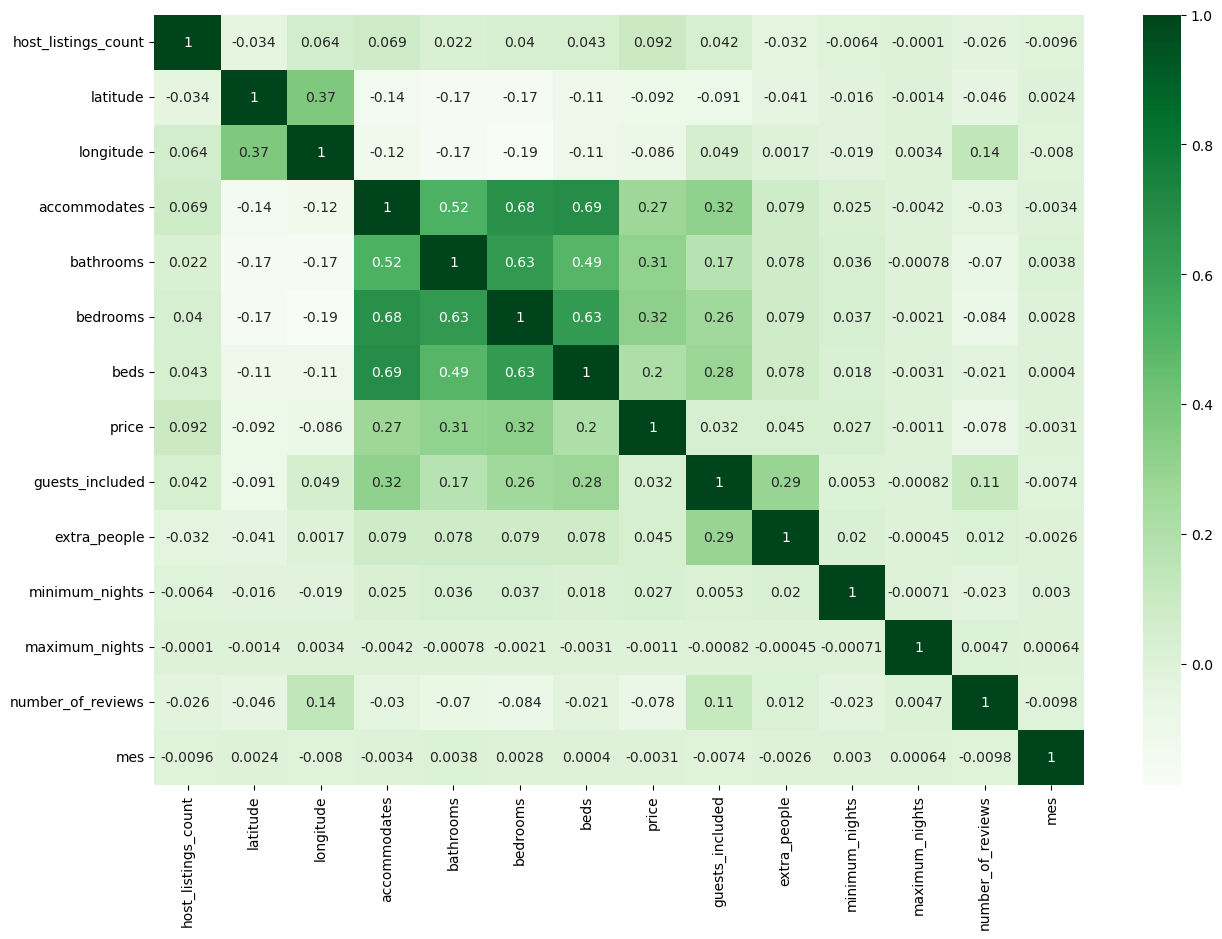

In [8]:
# o pandas já tem o método de calculo pronto 

plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(),annot = True,cmap = "Greens")

### Definição de funções para Análise de outliers

In [9]:
def limites (coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5*amplitude, q3 + 1.5*amplitude

def excluir_outlier (df, nome_coluna):
    qtde_linhas = df.shape[0]
    limite_inf, limite_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= limite_inf) & (df[nome_coluna] <= limite_sup),:]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas 
    

In [10]:
print(limites(base_airbnb['price']))
print('-'*80)
base_airbnb['price'].describe()

(-524.0, 1276.0)
--------------------------------------------------------------------------------


count    897709.000000
mean        647.922241
std        1705.104980
min           0.000000
25%         151.000000
50%         297.000000
75%         601.000000
max      138288.000000
Name: price, dtype: float64

In [11]:
def diagrama_caixa(coluna):
    fig, (ax1,ax2) =plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna,ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.histplot(coluna)
    
def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index ,y=coluna.value_counts())
    ax.set_xlim(limites(coluna))
    
    


### Price

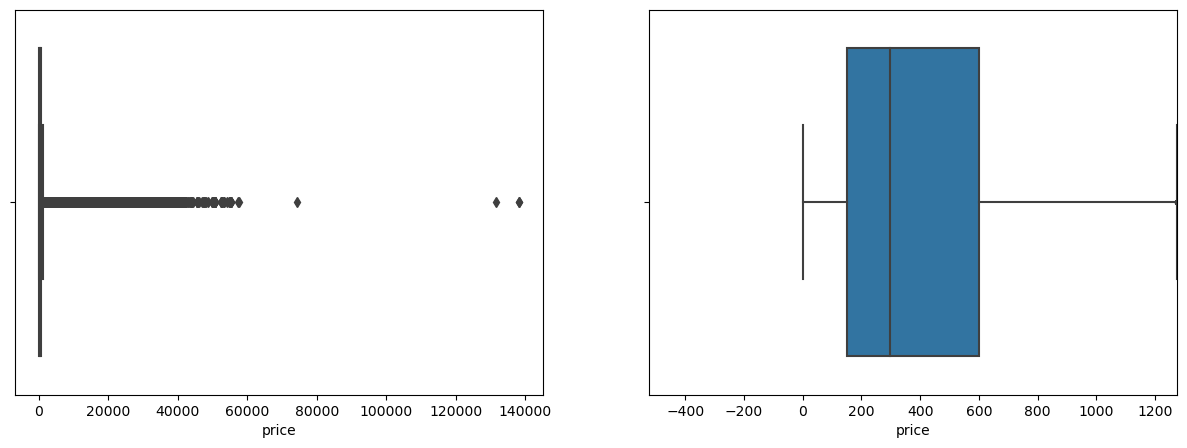

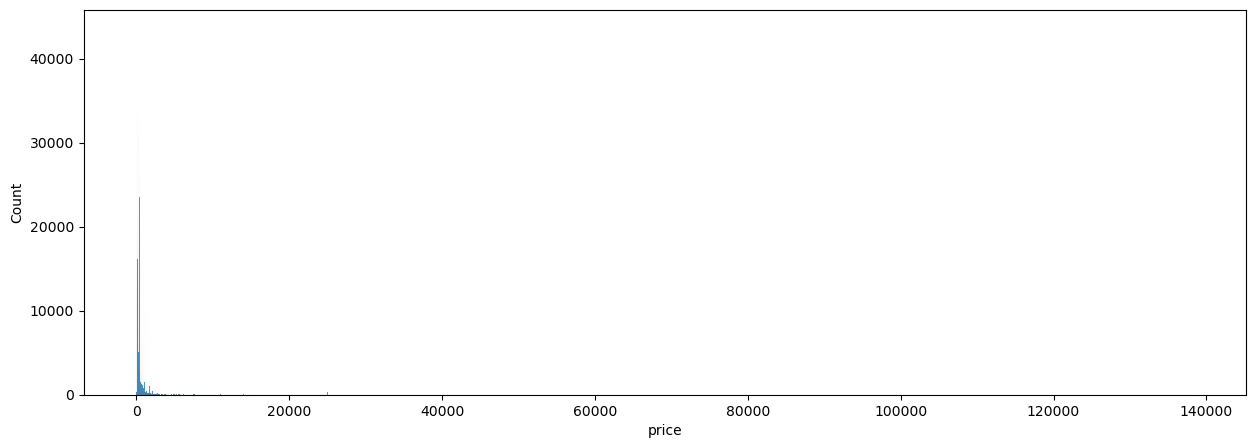

In [12]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Como estamos construindo um modelo visando o aluguel de imóveis comuns, os valores acima do nível superior, de alto padrão, serão excluídos como outliers


In [13]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'price')
print('{} foram removidas'.format(linhas_removidas))

87282 foram removidas


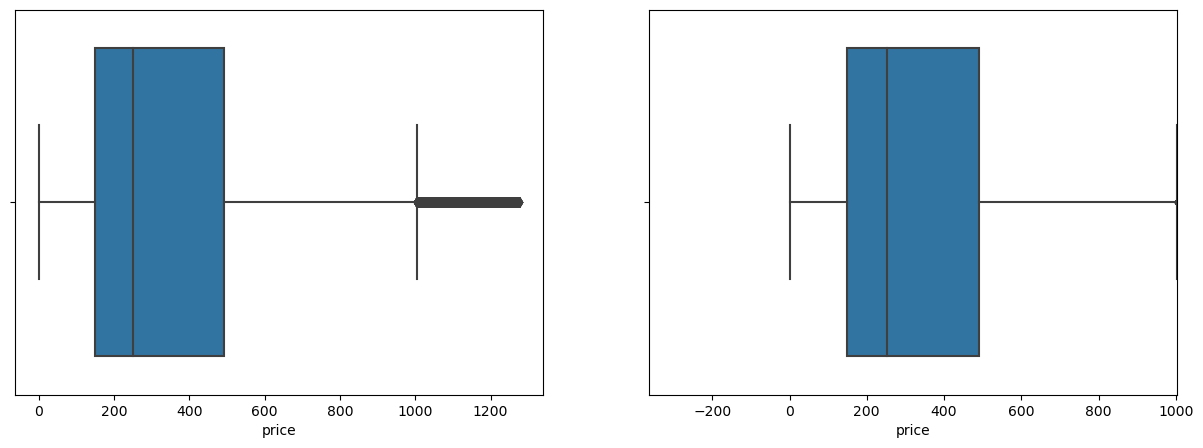

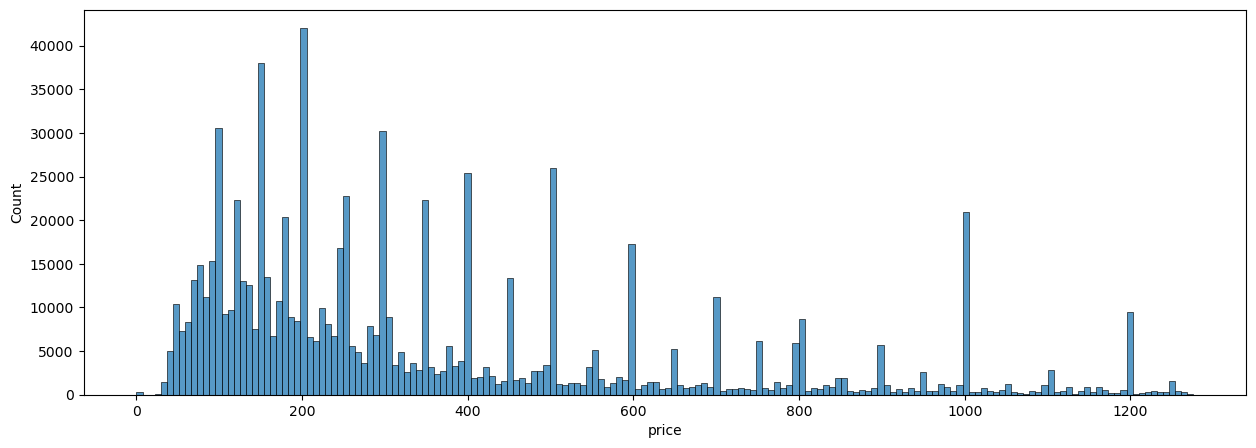

In [14]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

### Extra People

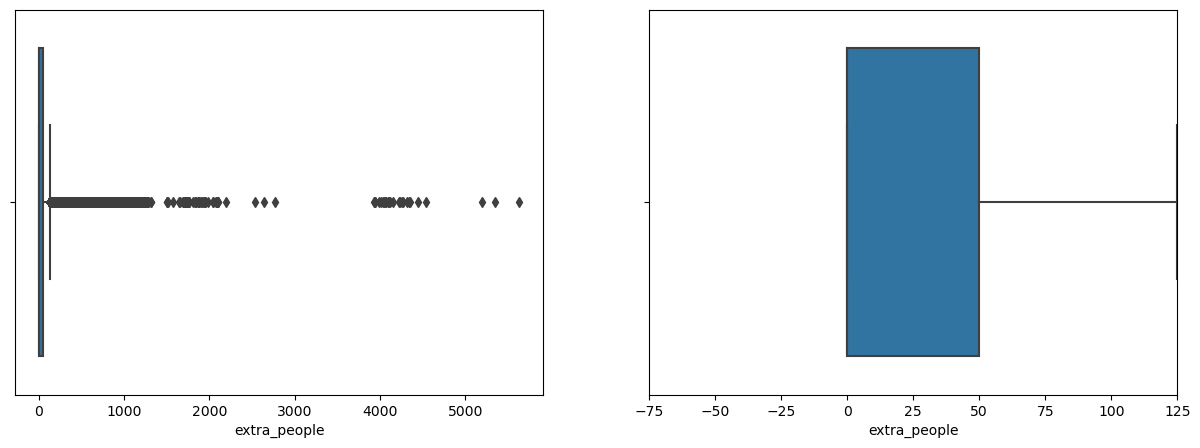

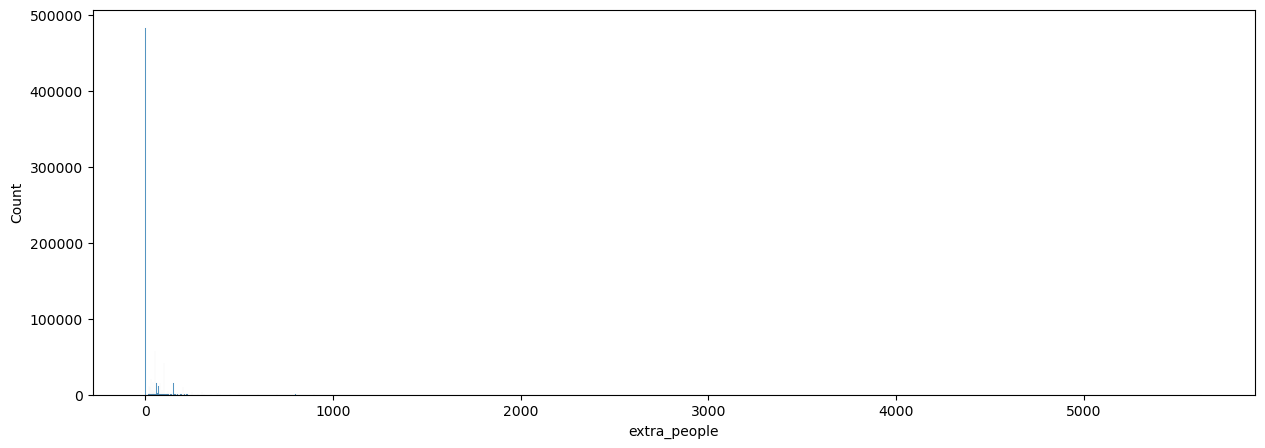

In [15]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [16]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'extra_people')
print('{} foram removidas'.format(linhas_removidas))

59194 foram removidas


host_listings_count         float64
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
guests_included               int64
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64



### Host listings count 

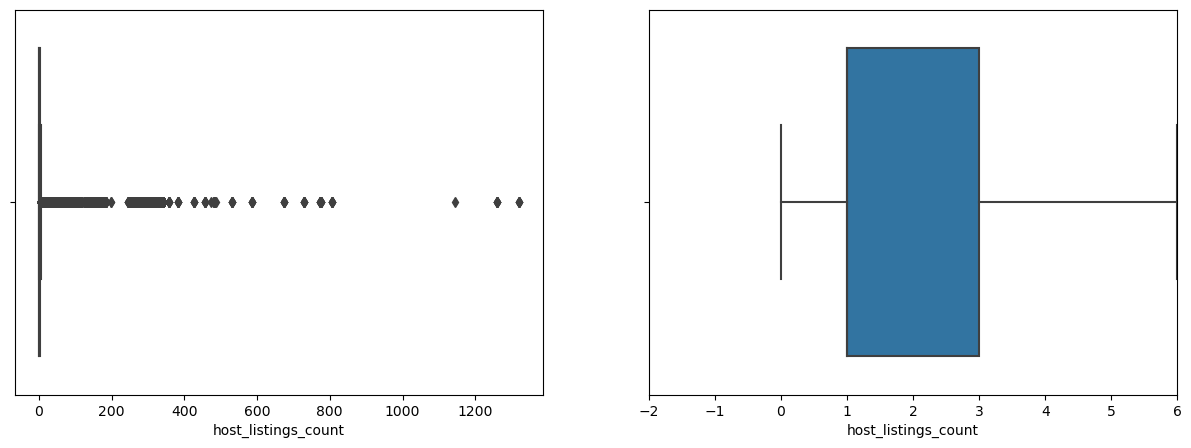

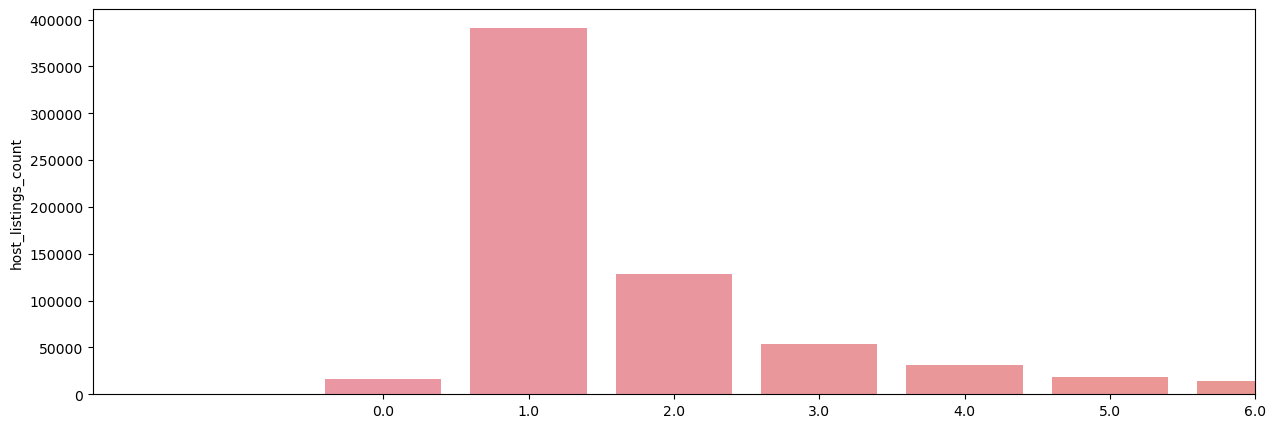

In [17]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

Iremos excluir os outliers, porque hosts com mais de 6 imóveis no airbnb não são os alvos do projeto, devem ser imobiliárias ou profissionais que gerenciam imóveis do airbnb 

In [18]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'host_listings_count')
print('{} foram removidas'.format(linhas_removidas))

97723 foram removidas


### Accomodates

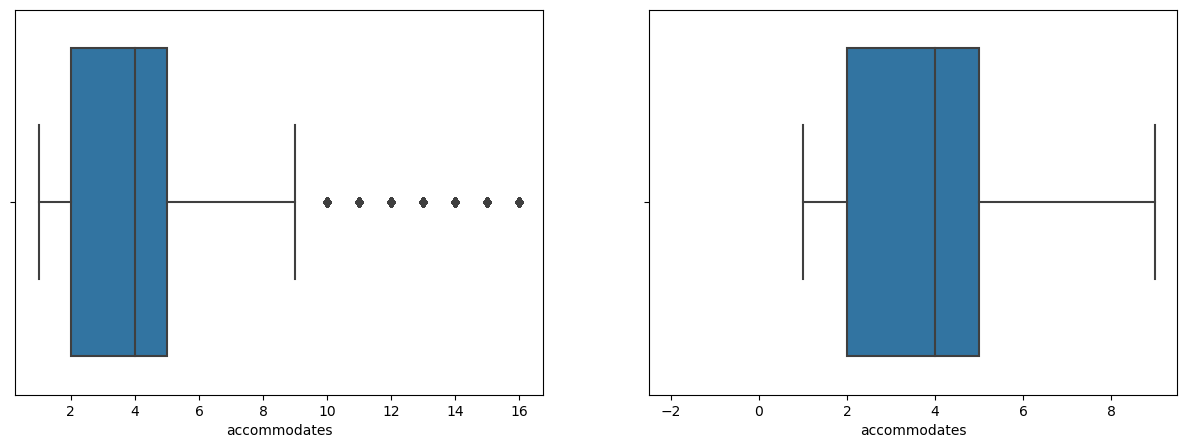

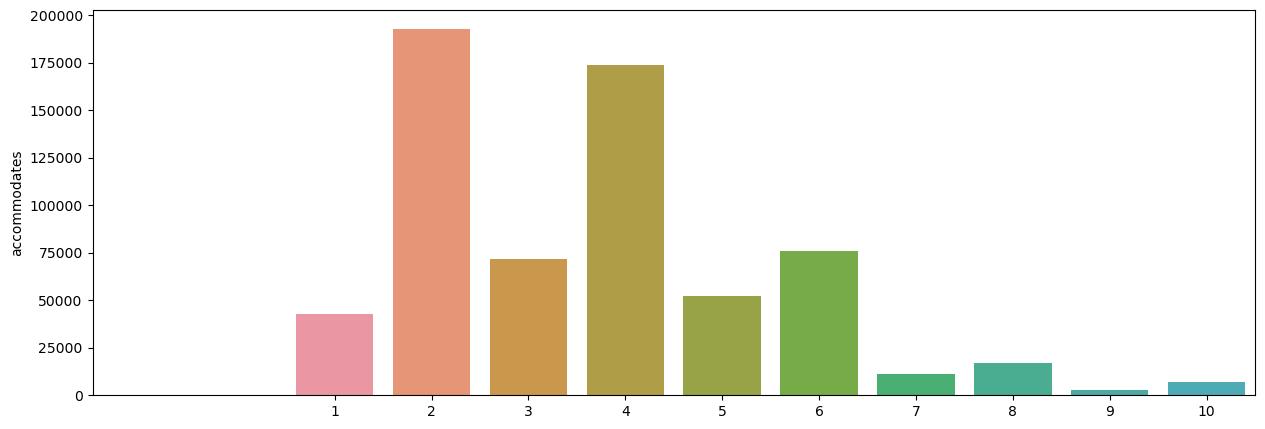

In [19]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [20]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'accommodates')
print('{} foram removidas'.format(linhas_removidas))

13146 foram removidas


### Bathrooms 

<Axes: ylabel='bathrooms'>

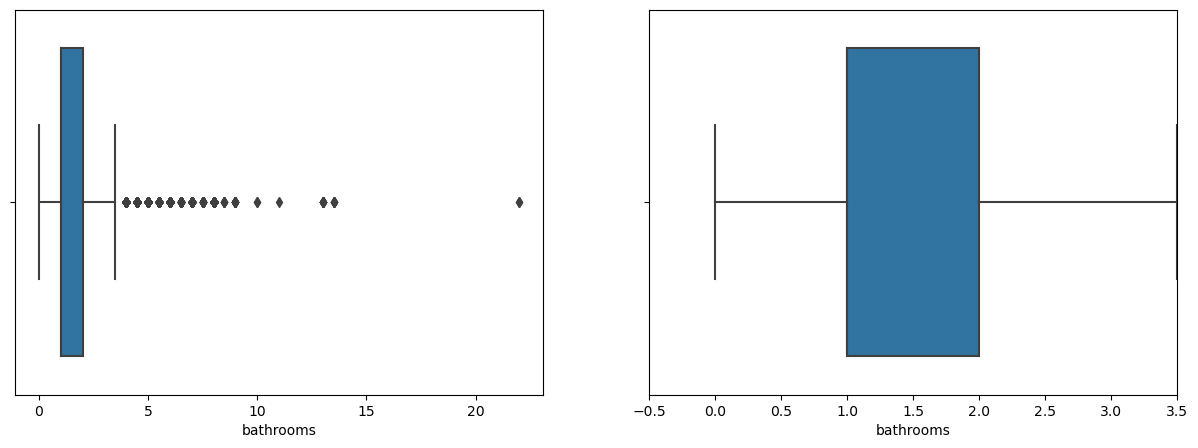

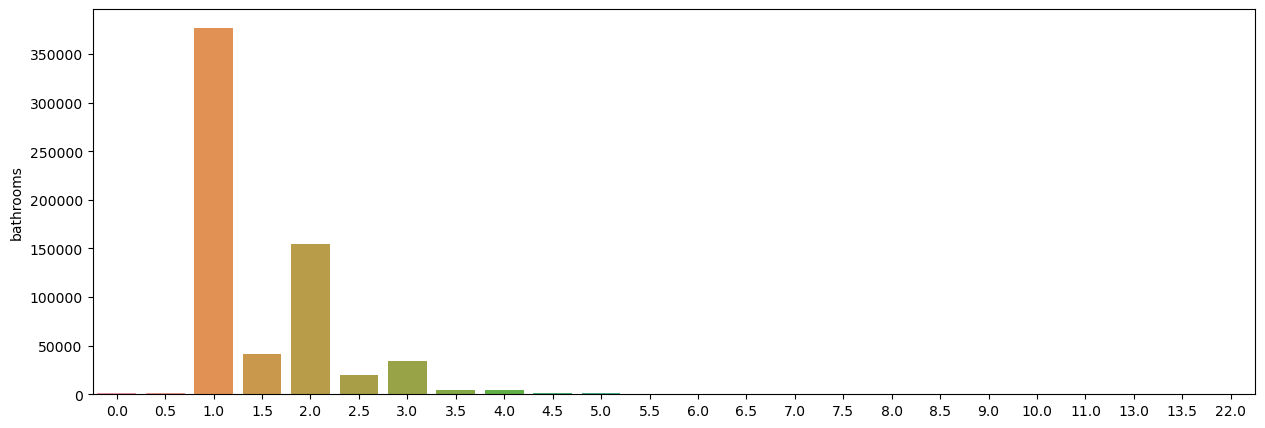

In [21]:
diagrama_caixa(base_airbnb['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['bathrooms'].value_counts().index, y= base_airbnb['bathrooms'].value_counts())

In [22]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'bathrooms')
print('{} foram removidas'.format(linhas_removidas))

6894 foram removidas


### Bedrooms

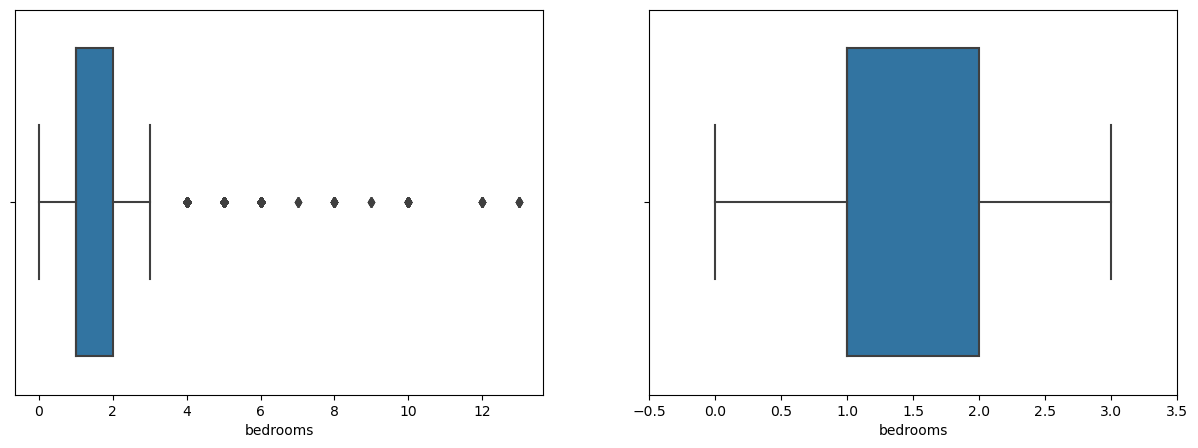

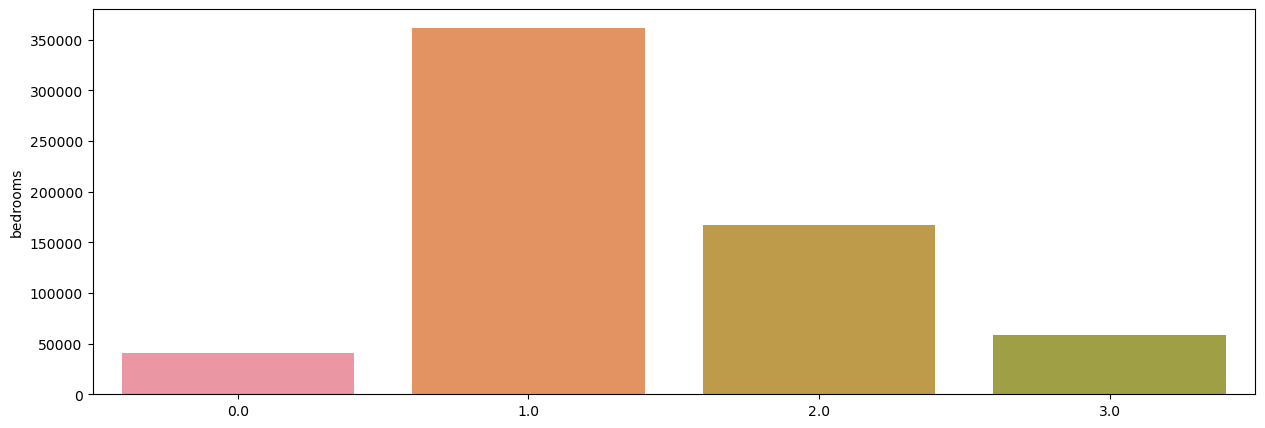

In [23]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [24]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'bedrooms')
print('{} foram removidas'.format(linhas_removidas))

5482 foram removidas


### Beds

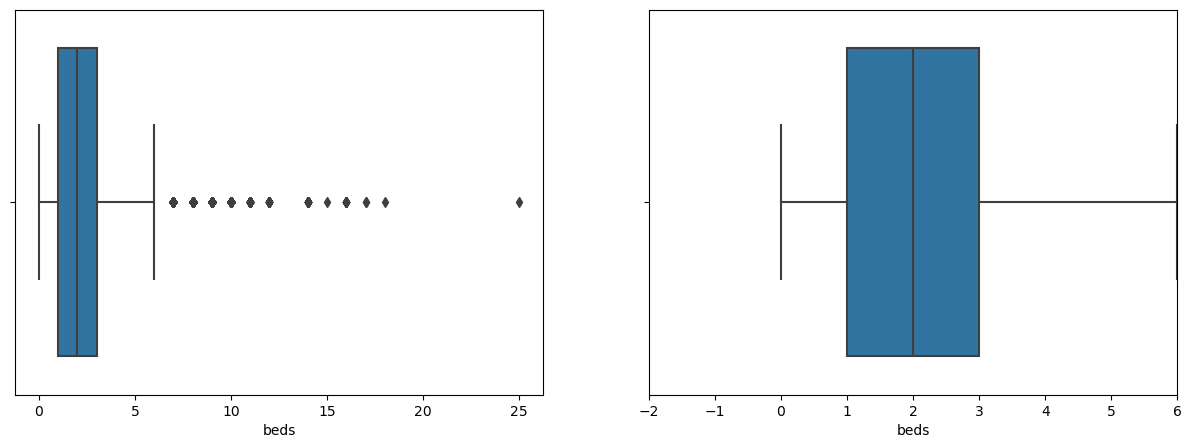

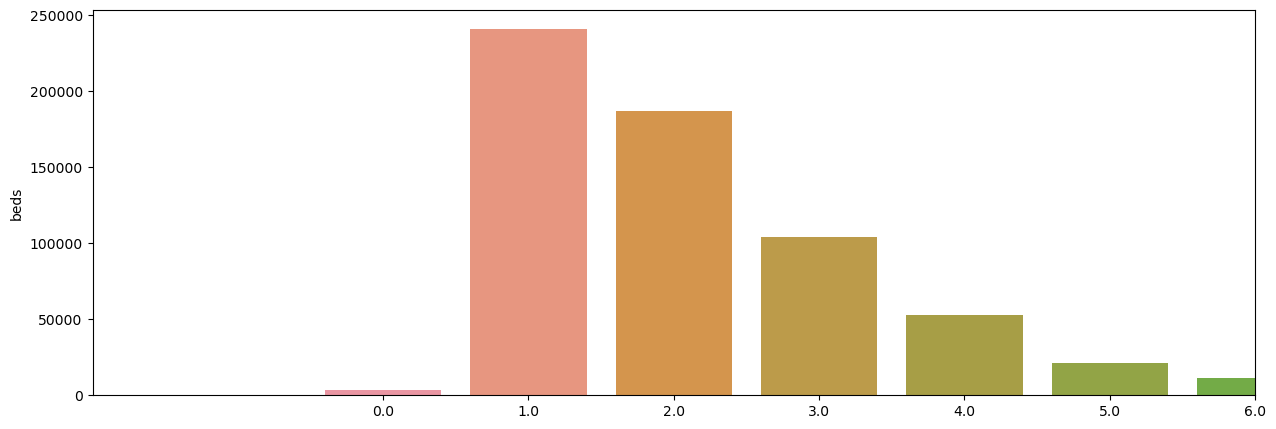

In [25]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [26]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'beds')
print('{} foram removidas'.format(linhas_removidas))

5622 foram removidas


### Guests included 

C:\Users\000468\AppData\Local\Temp\ipykernel_3796\2213963001.py:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim(limites(coluna))


(1.0, 1.0)


C:\Users\000468\AppData\Local\Temp\ipykernel_3796\2213963001.py:15: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(limites(coluna))


<Axes: ylabel='guests_included'>

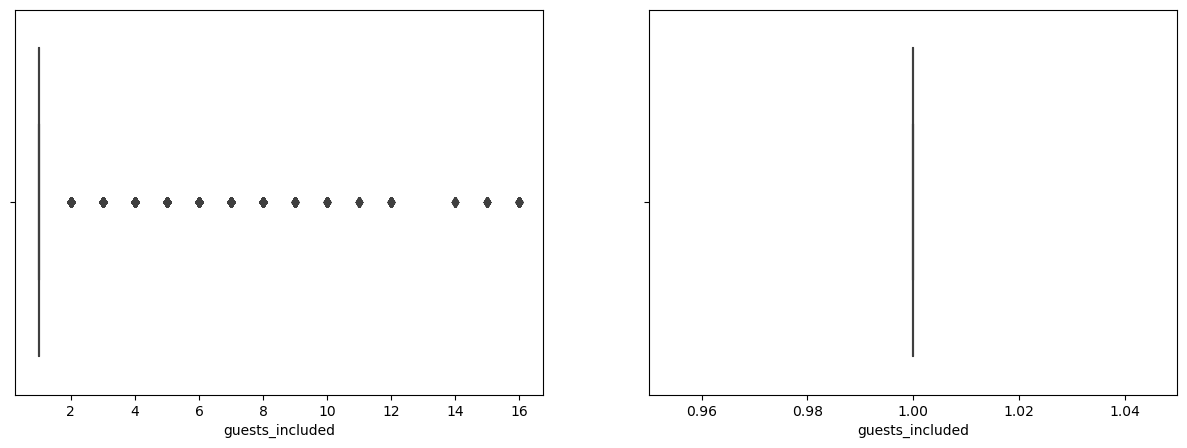

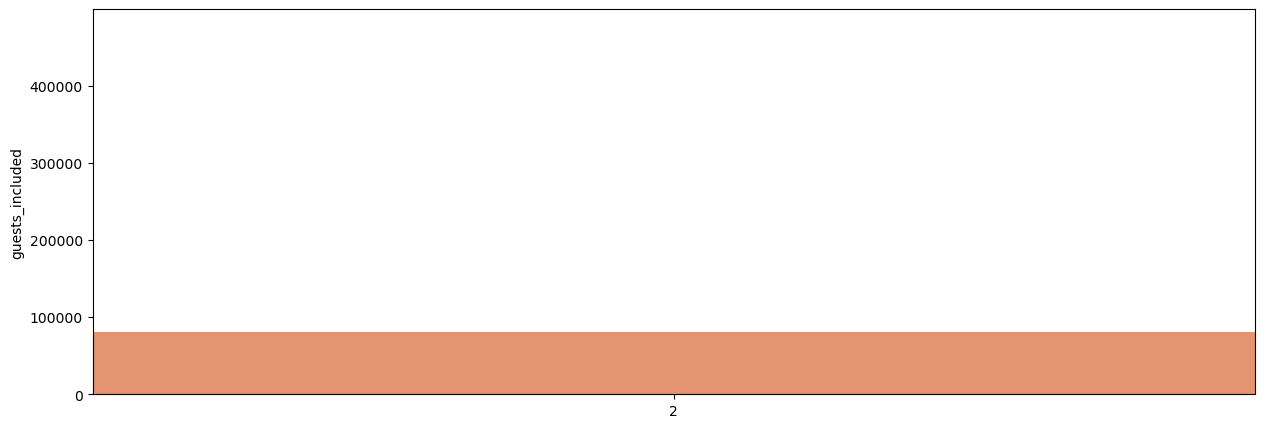

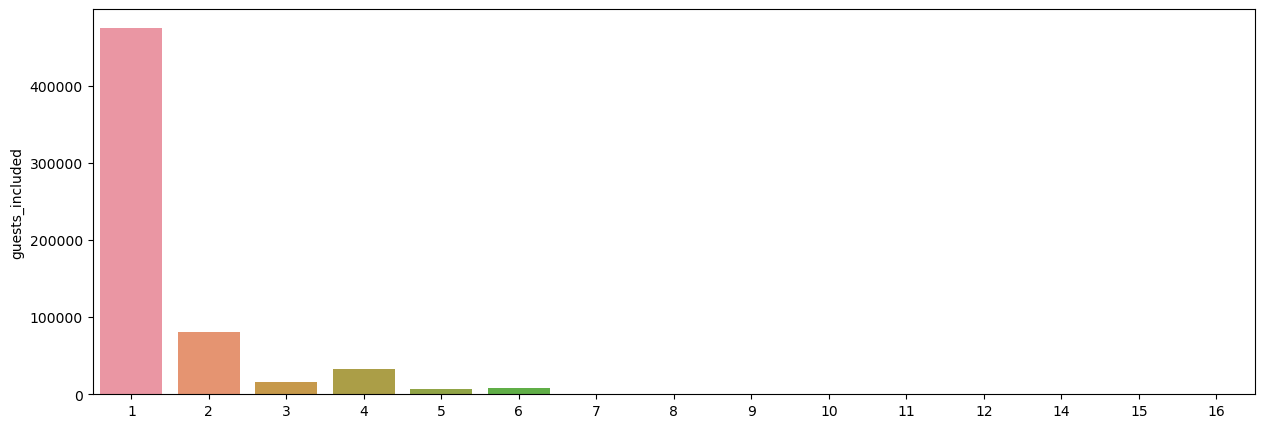

In [27]:
diagrama_caixa(base_airbnb['guests_included'])
grafico_barra(base_airbnb['guests_included'])
print(limites(base_airbnb['guests_included']))

plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb['guests_included'].value_counts().index, y= base_airbnb['guests_included'].value_counts())

A coluna Guests Included é interesante para nós porque ela apresentou um problema na forma que estavamos conduzindo nossa análises com numeros discretos, seus limites são ambos iguais a um, portanto teremos que modificar nossa forma de ver os dados.

Após ver os dados dispostos de uma outra forma podemos perceber que nossos dados estão agrupados perto do valor de 1,a partir do nosso conhecimento do app, podemos julgar isso como um erro de preenchiment, muitos dos hosts não utilizam essa ferramenta da forma adequada, portanto não seria produtivo excluir os outliers dessa coluna, perderiamos muitas linhas na nossa analise, o mais certo a fazer será retirar essa coluna da nossa análise, visto que ela se mostrou contra produtiva. 

In [28]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 22)

### Minimum Nights

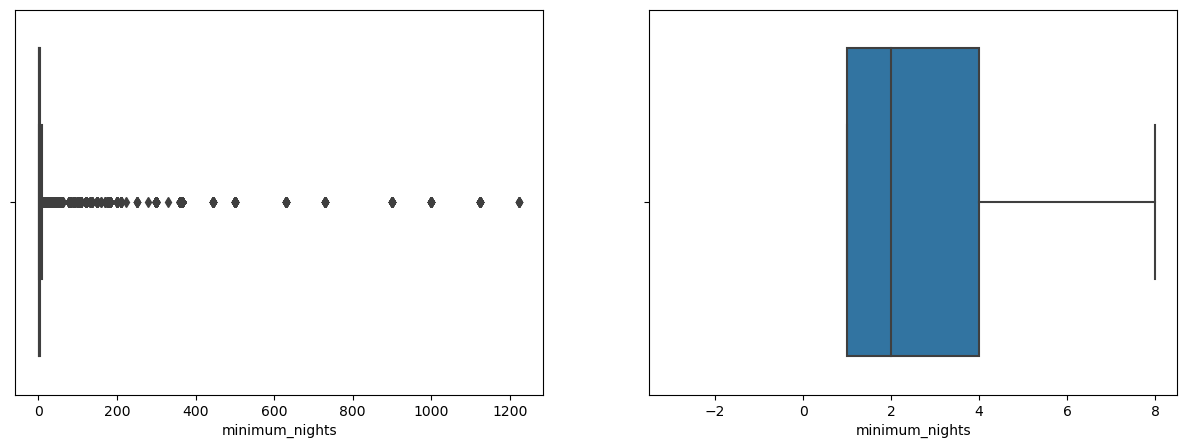

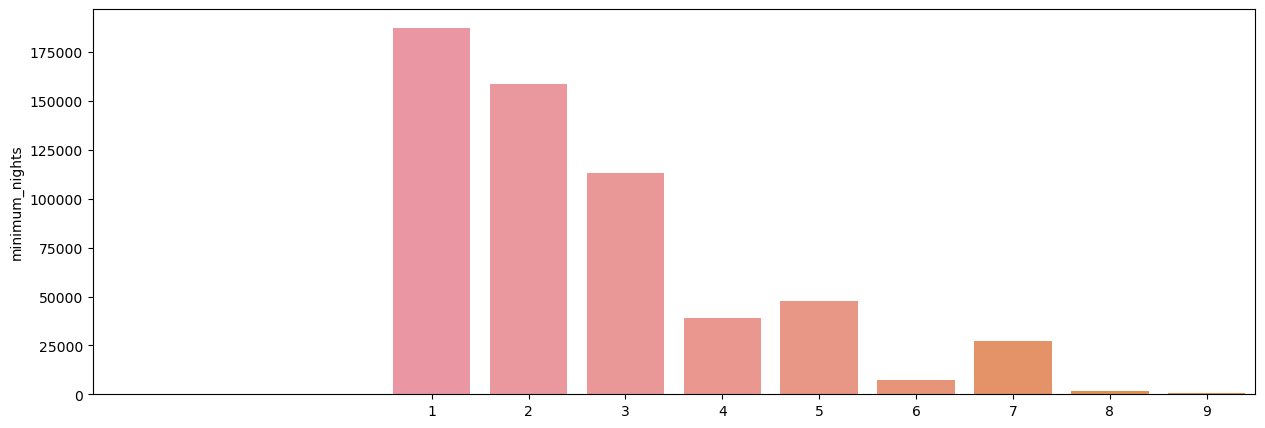

In [29]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [30]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'minimum_nights')
print('{} foram removidas'.format(linhas_removidas))

40383 foram removidas


### Maximum nights
- sofre do mesmo problema de guests included, devido ao preenchimento dos dados

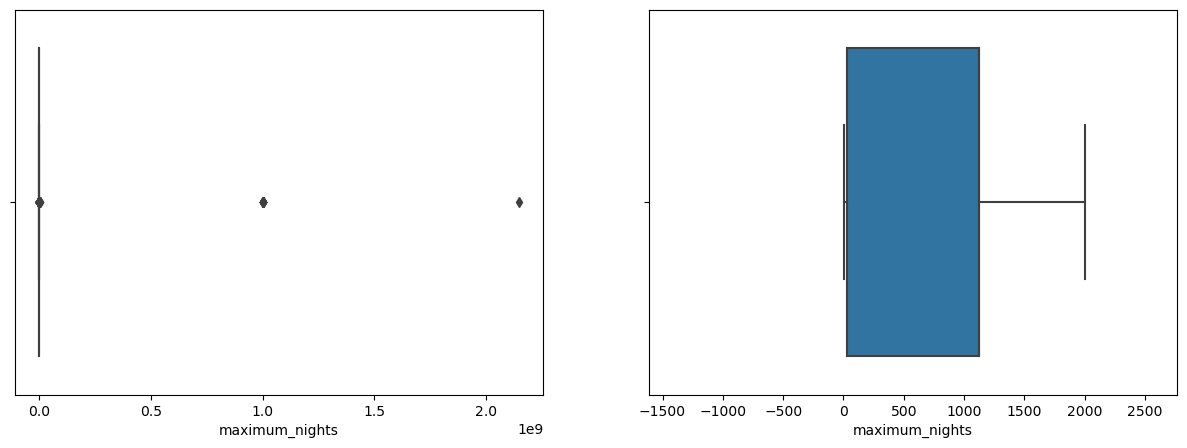

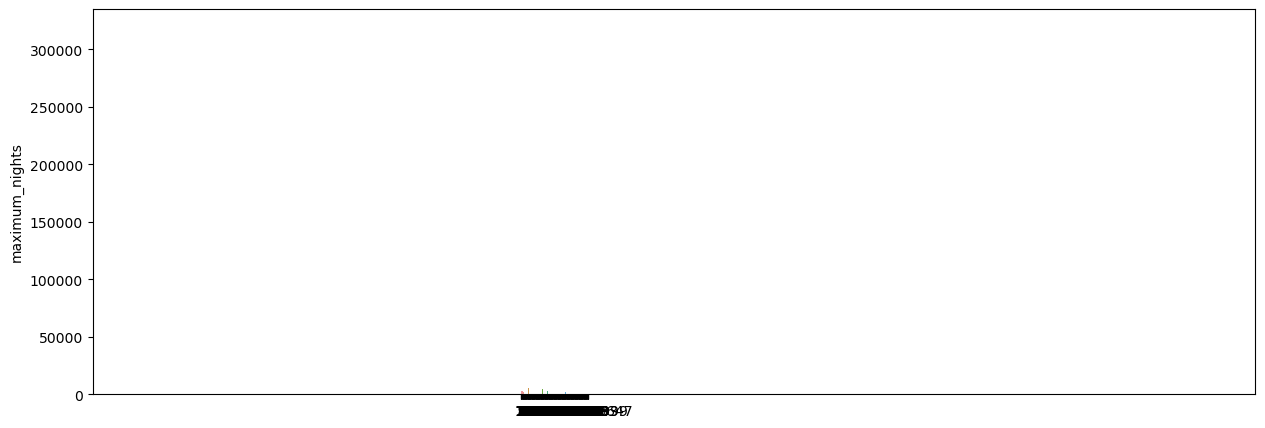

In [31]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

In [32]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)
base_airbnb.shape

(581983, 21)

### Number of reviews
- Iremos tirar o número de reviews

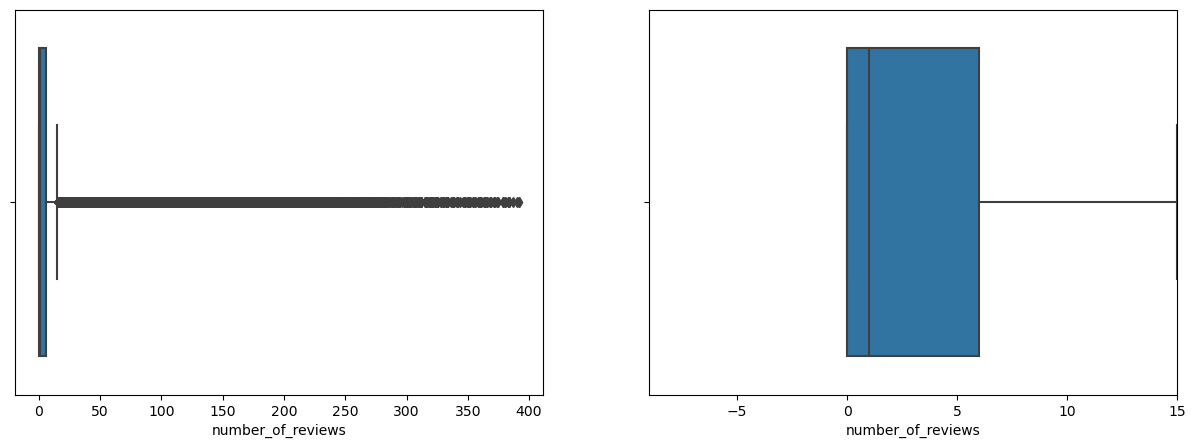

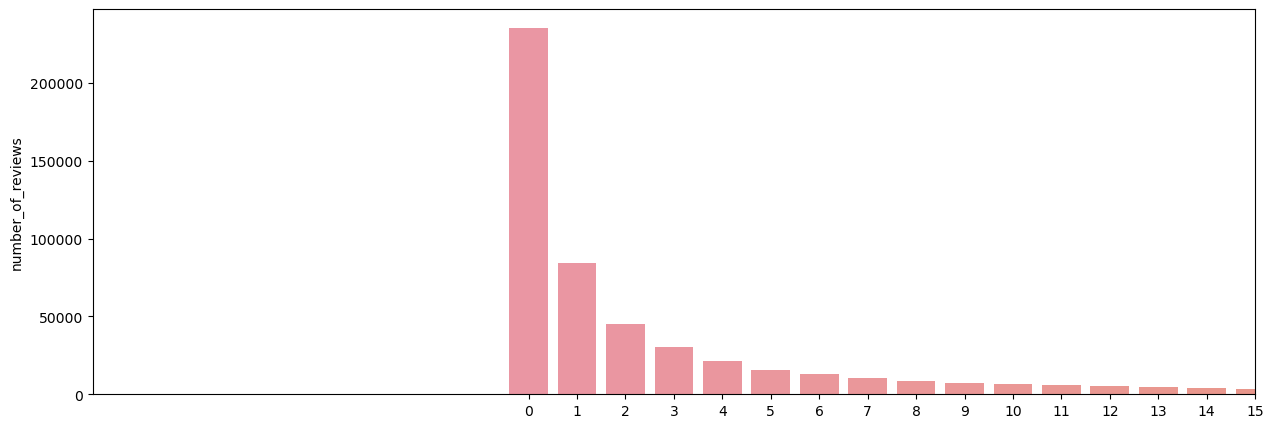

In [33]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

In [34]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 20)

### Tratamento de colunas de valores de texto

property_type                object
room_type                    object
bed_type                     object
amenities                    object
cancellation_policy          object


- Property type

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

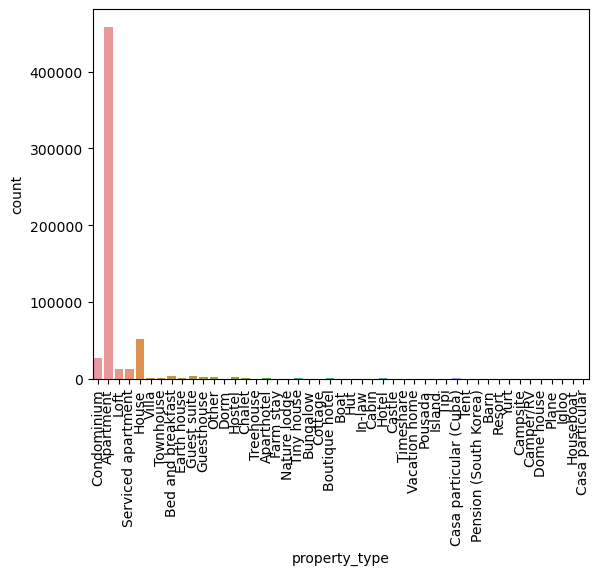

In [35]:
print(base_airbnb['property_type'].value_counts())
grafico = sns.countplot(data=base_airbnb, x ='property_type' )
grafico.tick_params(axis='x', rotation = 90)

In [36]:
tipos_de_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar=[]

for tipo in tipos_de_casa.index:
    if tipos_de_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type']==tipo,'property_type'] ='outros'
    
print(base_airbnb['property_type'].value_counts())



Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


### Room Type

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


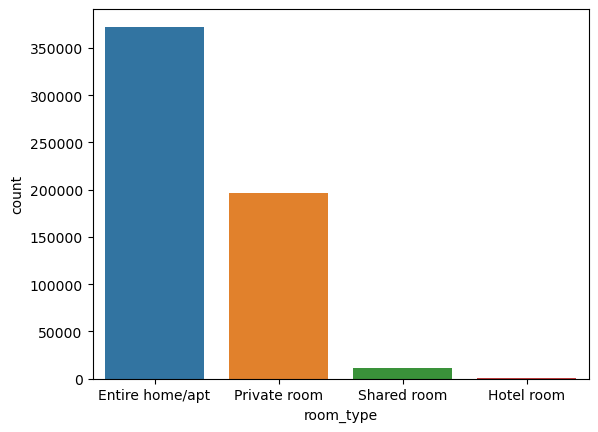

In [37]:
print(base_airbnb['room_type'].value_counts())
grafico = sns.countplot(data=base_airbnb, x ='room_type' )
    


### bed type   

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64


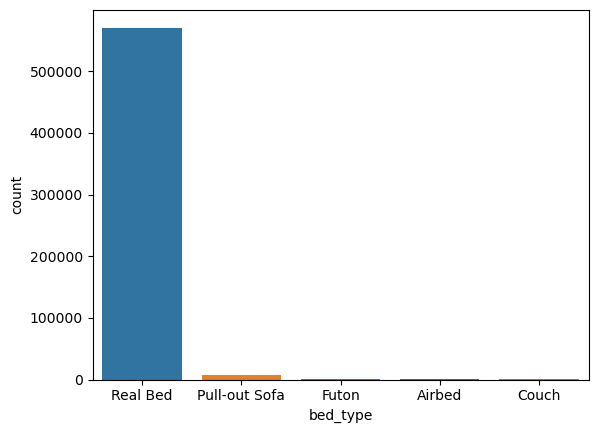

In [38]:
print(base_airbnb['bed_type'].value_counts())
grafico = sns.countplot(data=base_airbnb, x ='bed_type' )

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed      570643
outra cama     11340
Name: bed_type, dtype: int64


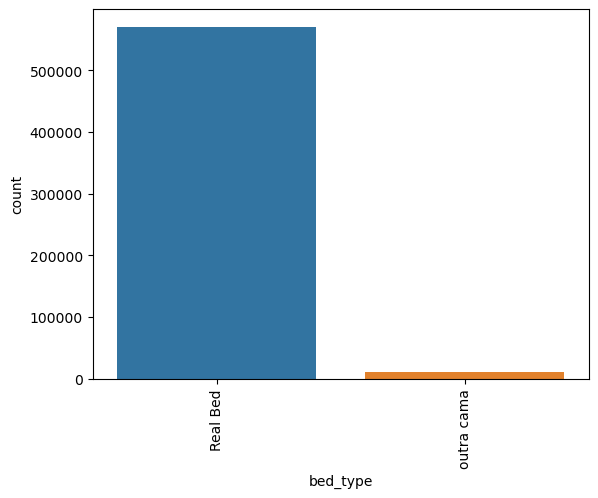

In [39]:
tipos_cama = base_airbnb['bed_type'].value_counts()
cama_agrupar = []

for tipo in tipos_cama.index:
    if tipos_cama[tipo] < 10000:
        cama_agrupar.append(tipo)
print(cama_agrupar)    

for tipo in cama_agrupar:
    base_airbnb.loc[base_airbnb['bed_type']==tipo,'bed_type'] ='outra cama'
    
print(base_airbnb['bed_type'].value_counts())
grafico = sns.countplot(data=base_airbnb, x ='bed_type' )
grafico.tick_params(axis='x', rotation = 90)

### cancellation policy   

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64


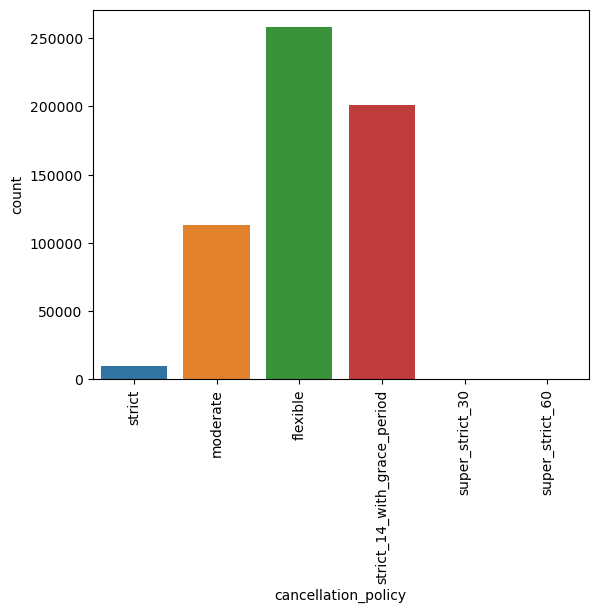

In [40]:
print(base_airbnb['cancellation_policy'].value_counts())
grafico = sns.countplot(data=base_airbnb, x ='cancellation_policy' )
grafico.tick_params(axis='x', rotation = 90)

['strict', 'super_strict_60', 'super_strict_30']
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: cancellation_policy, dtype: int64


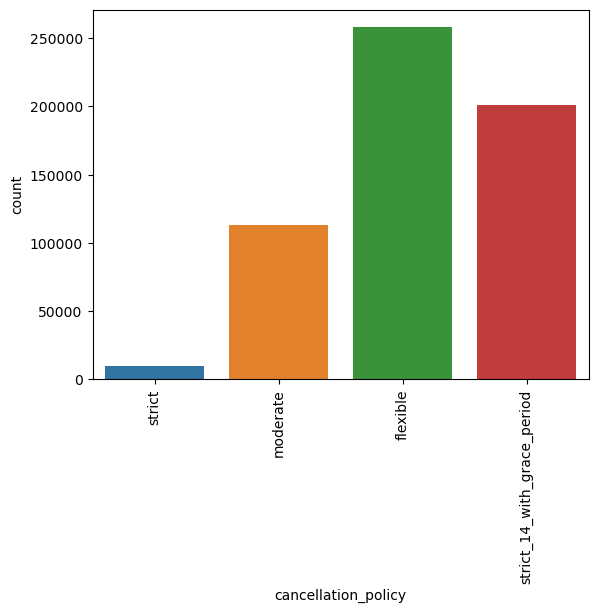

In [41]:
politicas_strict = base_airbnb['cancellation_policy'].value_counts()
politicas_agrupar = []

for tipo in politicas_strict.index:
    if politicas_strict[tipo] < 10000:
        politicas_agrupar.append(tipo)
print(politicas_agrupar)    
for tipo in politicas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy']==tipo,'cancellation_policy'] ='strict'
    
print(base_airbnb['cancellation_policy'].value_counts())
grafico = sns.countplot(data=base_airbnb, x ='cancellation_policy' )
grafico.tick_params(axis='x', rotation = 90)

### Amenities 
- como temos uma grande diversidade de amenities e as mesmas podem ser escritas de diferentes formas, vamos avaliar a quantidade de ameneties como parâmetro do nosso modelo.
- Como agora ela virou uma coluna numérica, vamos tratar ela da mesma forma como tratamos as colunas numéricas.

In [42]:
base_airbnb['n_amenities']= base_airbnb['amenities'].str.split(',').apply(len)
print(base_airbnb['n_amenities'])
base_airbnb = base_airbnb.drop('amenities', axis=1)
base_airbnb.shape

1        25
3        14
4        16
5        30
6        30
         ..
34323    15
34324    18
34325    12
34327    25
34328    17
Name: n_amenities, Length: 581983, dtype: int64


(581983, 20)

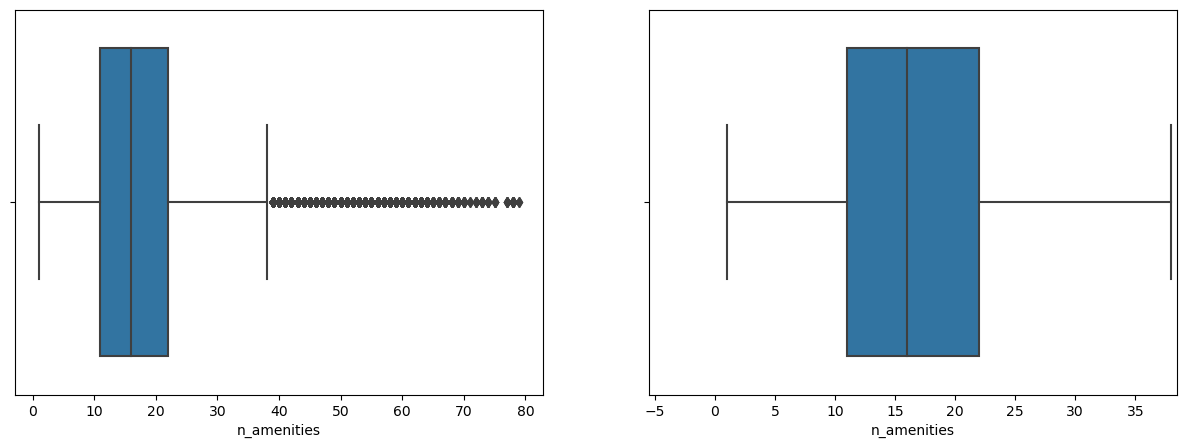

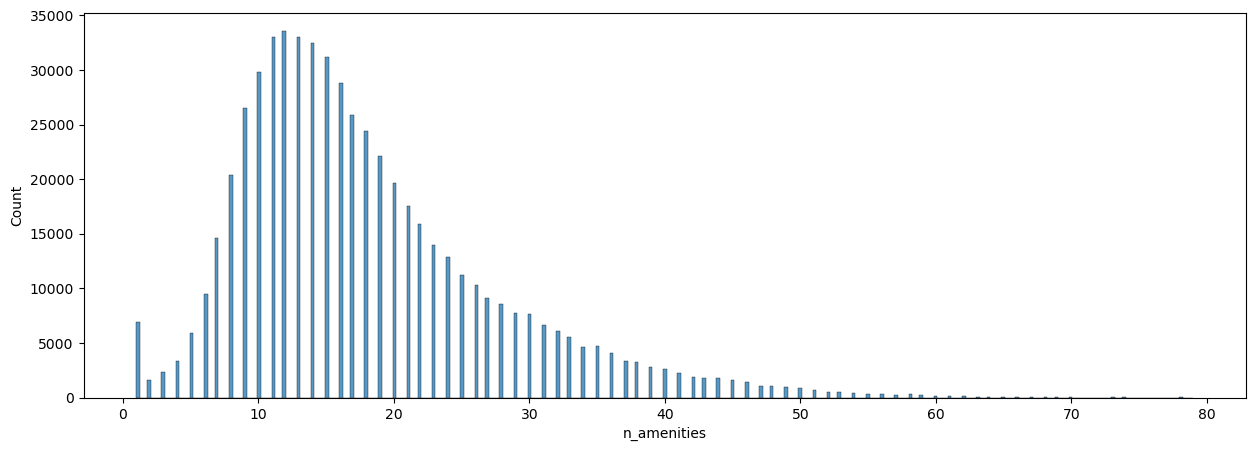

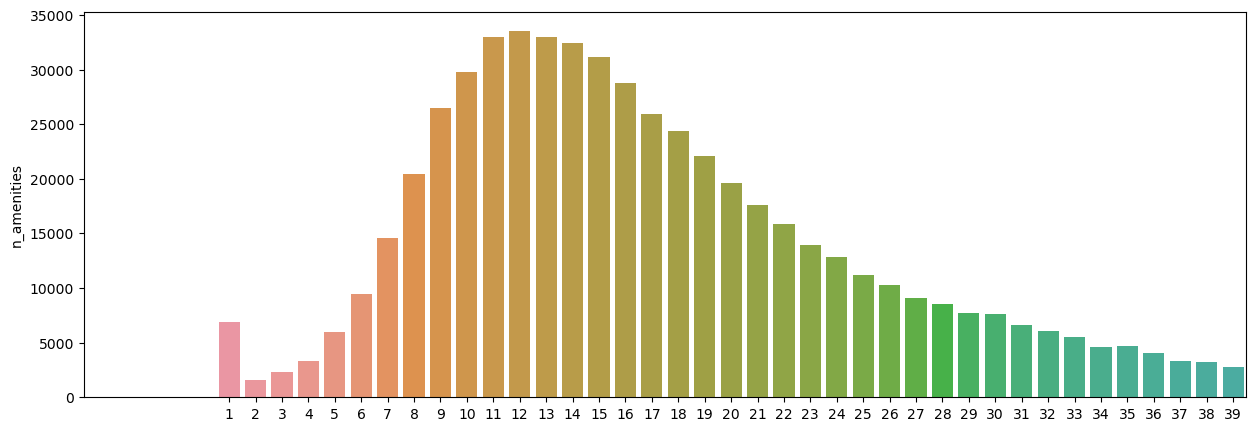

In [43]:
diagrama_caixa(base_airbnb['n_amenities'])
histograma(base_airbnb['n_amenities'])
grafico_barra(base_airbnb['n_amenities'])

In [44]:
base_airbnb, linhas_removidas = excluir_outlier(base_airbnb,'n_amenities')
print('{} foram removidas'.format(linhas_removidas))

24343 foram removidas


### Visualização de mapa Latitude e Longitude 

In [45]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(),'lon':amostra.longitude.mean()}
fig = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price',radius=2.5,center=centro_mapa,zoom=10,mapbox_style='stamen-terrain')

fig.show()

### Encoding
- ajustar as features para facilitar o trabalho do modelo futuro
- Features T or F serão substituidaspor 1 ou 0 
- Cara aFeatures de categotia vamos usar o método de verdadeiro ou falso 

In [46]:
#print(base_airbnb.dtypes)

colunas_tf = ['host_is_superhost','instant_bookable','is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()
for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 't',coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 'f',coluna] = 0
    
print(base_airbnb_cod.iloc[0])

host_is_superhost                         1
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                           Real Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable                          1
is_business_travel_ready                  0
cancellation_policy                  strict
ano                                    2018
mes                                       4
n_amenities                              25
Name: 1, dtype: object


In [47]:
colunas_categorias = ['property_type','room_type','bed_type','cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)
display(base_airbnb_cod.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                          1                    0                      0   
3                          1                    0                      0   
4                          1                    0                      0   
5                          1                    0                      0   
6                          1                    0                      0   

  room_type_Shared room  bed_type_Real Bed  bed_type_outra cama  \
1                     0                  1                    0   
3                     0                  1                    0   
4                     0                  1                    0   
5                     0                  1                    0   
6                     0                  1                    0   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                             0                             0   
3                             0                             0   
4                             0                             0   
5                             0                             0   
6                             0                             0   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                           1                                                0  
3                           1                                                0  
4                           1                                                0  
5                           1                                                0  
6                           1                                                0  

[5 rows x 36 columns]

### Modelo de Previsão 

- Métricas de avaliação

In [48]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste,previsao))
    return f'Modelo {nome_modelo}:\nR2:{r2:.2%}\nRSME:{RSME:.2f}'


- Escolha dos modelos a serem testados
    1. Random Forest
    2. Linear Regression
    3. Extra Tree

In [49]:
modelo_random_forest = RandomForestRegressor()
modelo_linear_regression = LinearRegression()
modelo_extra_trees = ExtraTreesRegressor()


modelos = {'RandomForest': modelo_random_forest,
          'LinearRegression': modelo_linear_regression,
          'ExtraTrees':modelo_extra_trees,
          }

Y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis = 1)



- Separar os dados em treino, teste  e Teste do Modelo

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)

for nome_modelo, modelo in modelos.items():
    modelo.fit(X_train,Y_train)
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo,Y_test,previsao))
    
    


Modelo RandomForest:
R2:97.25%
RSME:44.00
Modelo LinearRegression:
R2:32.70%
RSME:217.54
Modelo ExtraTrees:
R2:97.50%
RSME:41.94


- O modelo de ExtraTrees foi escolhido o melhor modelo nesse caso.
  1. Visto que seu R2 foi o maior que tivemos e menor RSME, mesmoq eu sendo por uma pequena margem levando em consideração o Ramdom Forest, visto que eles tiveram um tempo parecido de execução. 
  2. resultados das métricas
     - Modelo ExtraTrees:
     - R2:97.50%
     - RSME:41.94

0
bedrooms                                         0.114628
latitude                                         0.104307
longitude                                        0.101465
n_amenities                                      0.089304
extra_people                                     0.087097
accommodates                                     0.070582
room_type_Entire home/apt                        0.069139
bathrooms                                        0.067750
minimum_nights                                   0.064860
beds                                             0.052440
host_listings_count                              0.039761
instant_bookable                                 0.022051
cancellation_policy_flexible                     0.019355
host_is_superhost                                0.013924
property_type_Apartment                          0.012892
cancellation_policy_moderate                     0.012317
ano                                              0.011278
cancellation_policy_strict_14_with_grace_period  0.007656
property_type_House                              0.006906
property_type_Condominium                        0.005194
mes                                              0.004716
room_type_Private room                           0.003673
bed_type_Real Bed                                0.002738
bed_type_outra cama                              0.002639
property_type_outros                             0.002374
property_type_Serviced apartment                 0.002247
property_type_Loft                               0.002153
room_type_Shared room                            0.001884
property_type_Bed and breakfast                  0.001297
property_type_Guesthouse                         0.000915
cancellation_policy_strict                       0.000851
property_type_Guest suite                        0.000659
property_type_Hostel                             0.000639
room_type_Hotel room                             0.000309
is_business_travel_ready                         0.000000

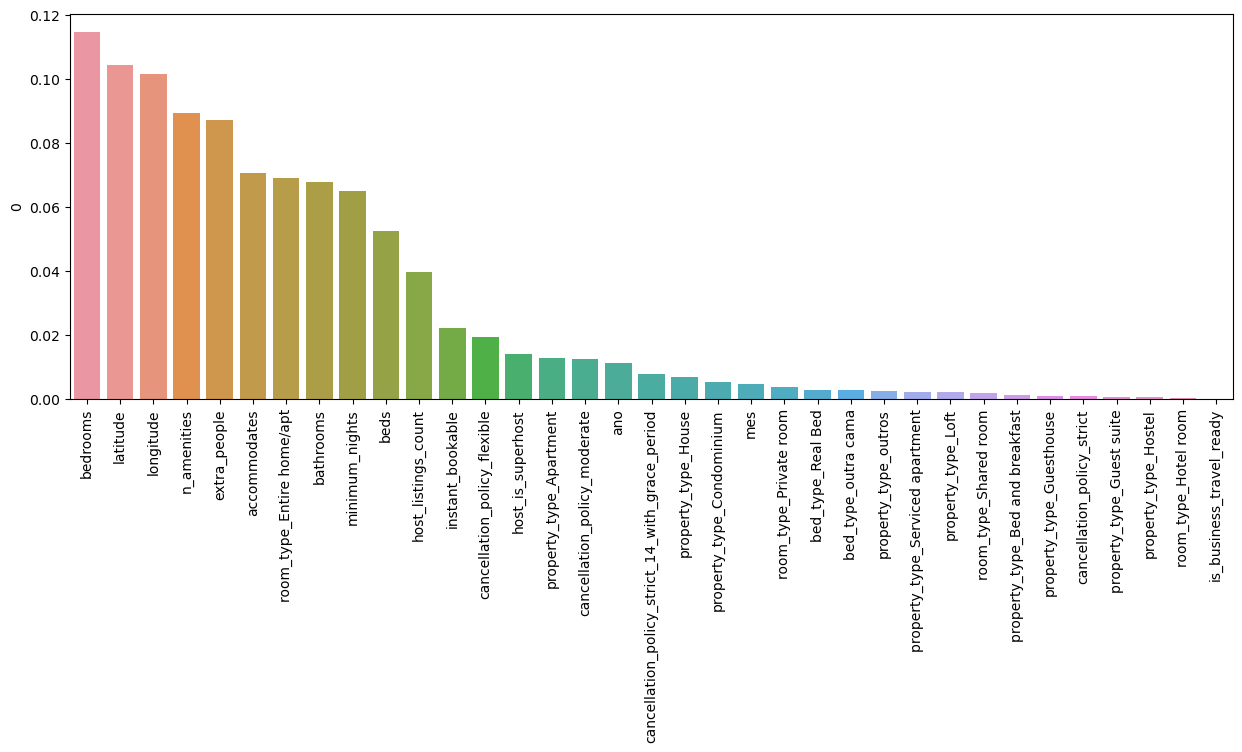

In [51]:
importancia_features = pd.DataFrame(modelo_extra_trees.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0,ascending = False)
display(importancia_features)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y= importancia_features[0])
ax.tick_params(axis='x', rotation = 90)

### Ajustes finais do modelo 
- vamos retirar colunas que não aparentam ter qualquer diferença no modelo, e vamos testar nosso modelo novamente

- Modelo ExtraTrees:
- R2:97.50%
- RSME:41.94


In [52]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready', axis = 1)

Y = base_airbnb_cod['price']
X = base_airbnb_cod.drop('price', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)


modelo_extra_trees.fit(X_train,Y_train)
previsao = modelo_extra_trees.predict(X_test)
print(avaliar_modelo('ExtraTrees',Y_test,previsao))
    

Modelo ExtraTrees:
R2:97.51%
RSME:41.86


In [53]:
#base_airbnb_cod2 = base_airbnb_cod.copy()

#for coluna in base_airbnb_cod2:
    #if 'bed_type' in coluna:
        #base_airbnb_cod2 = base_airbnb_cod2.drop(coluna, axis = 1)
    
#Y = base_airbnb_cod2['price']
#X = base_airbnb_cod2.drop('price', axis = 1)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)


#modelo_extra_trees.fit(X_train,Y_train)
#previsao = modelo_extra_trees.predict(X_test)
#print(avaliar_modelo('ExtraTrees',Y_test,previsao))

- a linha de código acima foi comentada visto que após uma análise do novo reslutado do modelo tirando as colunas de Bed Type o modelo não apresentou uma significante melhora em suas métricas e o tempo de execução do modelo também não apresentou uma diferença significativa para a execução.
- Modelo ExtraTrees:
- R2:97.48%
- RSME:42.12

### Deploy do projeto 
- Outro arquivo python
- Importar streamlit 
- Atribuir ao botão o carregamento do modelo 

In [54]:
X['price'] = Y
#X.to_csv('dados.csv')

In [55]:
import joblib
import streamlit as st
#joblib.dump(modelo_extra_trees,'modelo.joblib')

In [56]:
x_numericos = {'latitude': 0, 'longitude': 0, 'accommodates': 0, 'bathrooms': 0, 'bedrooms': 0, 'beds': 0, 'extra_people': 0,
                   'minimum_nights': 0, 'ano': 0, 'mes': 0, 'n_amenities': 0, 'host_listings_count': 0}

x_tf = {'host_is_superhost': 0, 'instant_bookable': 0}

x_listas = {'property_type': ['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Outros', 'Serviced apartment'],
                'room_type': ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
                'cancelation_policy': ['flexible', 'moderate', 'strict', 'strict_14_with_grace_period']}

for item in x_numericos:
    valor = st.number_input(f'{item}')
    
for item in x_tf:
    valor = st.selectbox(f'{item}',('Sim','Não'))
    
for item in x_listas:
    valor =st.selectbox(f'{item}',x_listas[item])
    
botao = st.button('Prever o valor do imóvel')


2023-05-21 20:31:10.024 
  command:

    streamlit run C:\Users\000468\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
